In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray


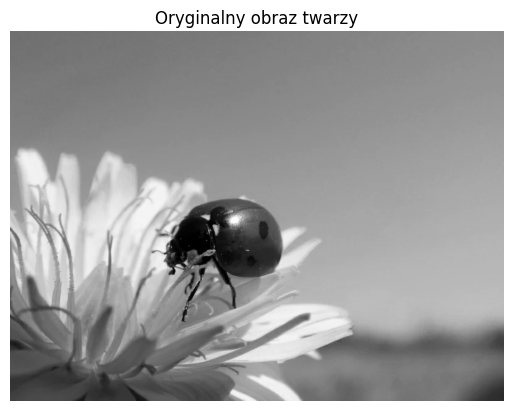

In [4]:
# Wczytanie obrazu (np. 1.webp z poprzedniego zadania)
image = imread("1.webp")

# Konwersja do skali szarości
gray = rgb2gray(image)

# Wyświetlenie oryginału
plt.imshow(gray, cmap='gray')
plt.title("Oryginalny obraz twarzy")
plt.axis('off')
plt.show()

In [5]:
# Dekompozycja SVD
U, S, VT = np.linalg.svd(gray, full_matrices=False)

In [6]:
# Całkowita energia
total_energy = np.sum(S**2)

# Skumulowana energia
cumulative_energy = np.cumsum(S**2)

# Znalezienie minimalnego r, przy którym zachowane jest >10% energii
threshold = 0.10
r = np.argmax(cumulative_energy >= threshold * total_energy) + 1

print(f"Minimalna liczba twarzy własnych (wartości własnych), aby zachować >10% informacji: r = {r}")


Minimalna liczba twarzy własnych (wartości własnych), aby zachować >10% informacji: r = 1


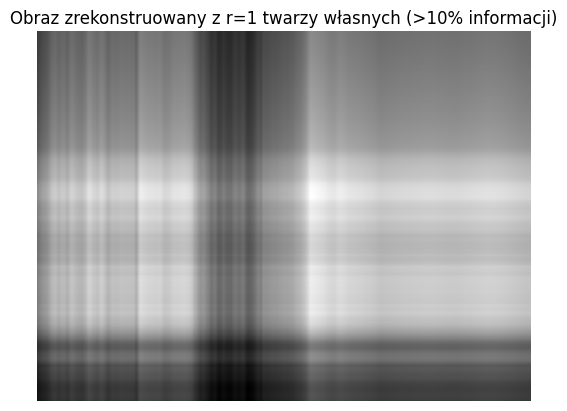

In [7]:
# Przycięcie do r składników
U_r = U[:, :r]
S_r = np.diag(S[:r])
VT_r = VT[:r, :]

# Rekonstrukcja
reconstructed = U_r @ S_r @ VT_r

# Wyświetlenie obrazu
plt.imshow(reconstructed, cmap='gray')
plt.title(f"Obraz zrekonstruowany z r={r} twarzy własnych (>10% informacji)")
plt.axis('off')
plt.show()
